In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import gdown

In [0]:
IMG = '/content/drive/My Drive/PlantVillage (1)'

In [0]:
bs = 64 # batch_size


In [0]:
img_data = ImageDataBunch.from_folder(path=IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224)

In [0]:
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (44043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: /content/drive/My Drive/PlantVillage (1);

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot
Path: /content/drive/My Drive/PlantVillage (1);

Test: None

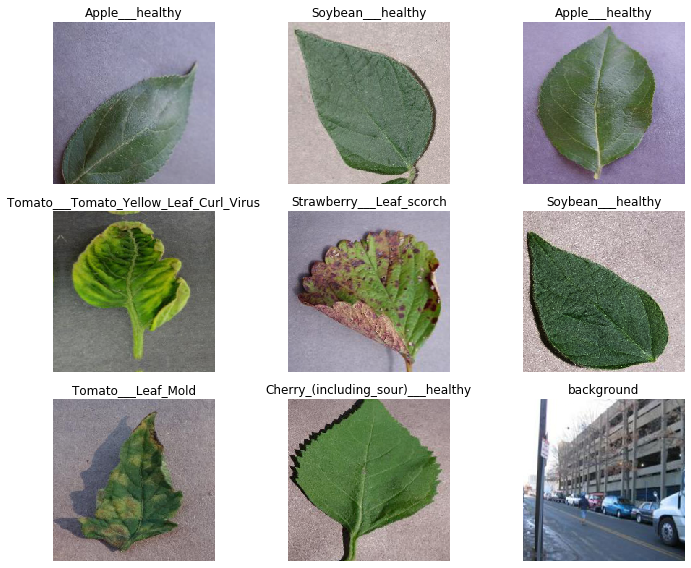

In [0]:
img_data.show_batch(rows=3, figsize=(10,8))

In [0]:
img_data.c

39

In [0]:
img_data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [0]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

In [0]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.315782,0.167017,0.944656,0.055344,3:50:31
1,0.208876,0.104854,0.969011,0.030989,10:05
2,0.113868,0.041009,0.985187,0.014813,10:02
3,0.072047,0.030710,0.989004,0.010996,10:07
4,0.058338,0.026867,0.990094,0.009905,10:11


In [0]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.107039,0.048856,0.984642,0.015358,10:05
1,0.053161,0.027456,0.990912,0.009088,10:02


In [0]:
model.save('train_7_cycles')

In [0]:
interpret = ClassificationInterpretation.from_learner(model)

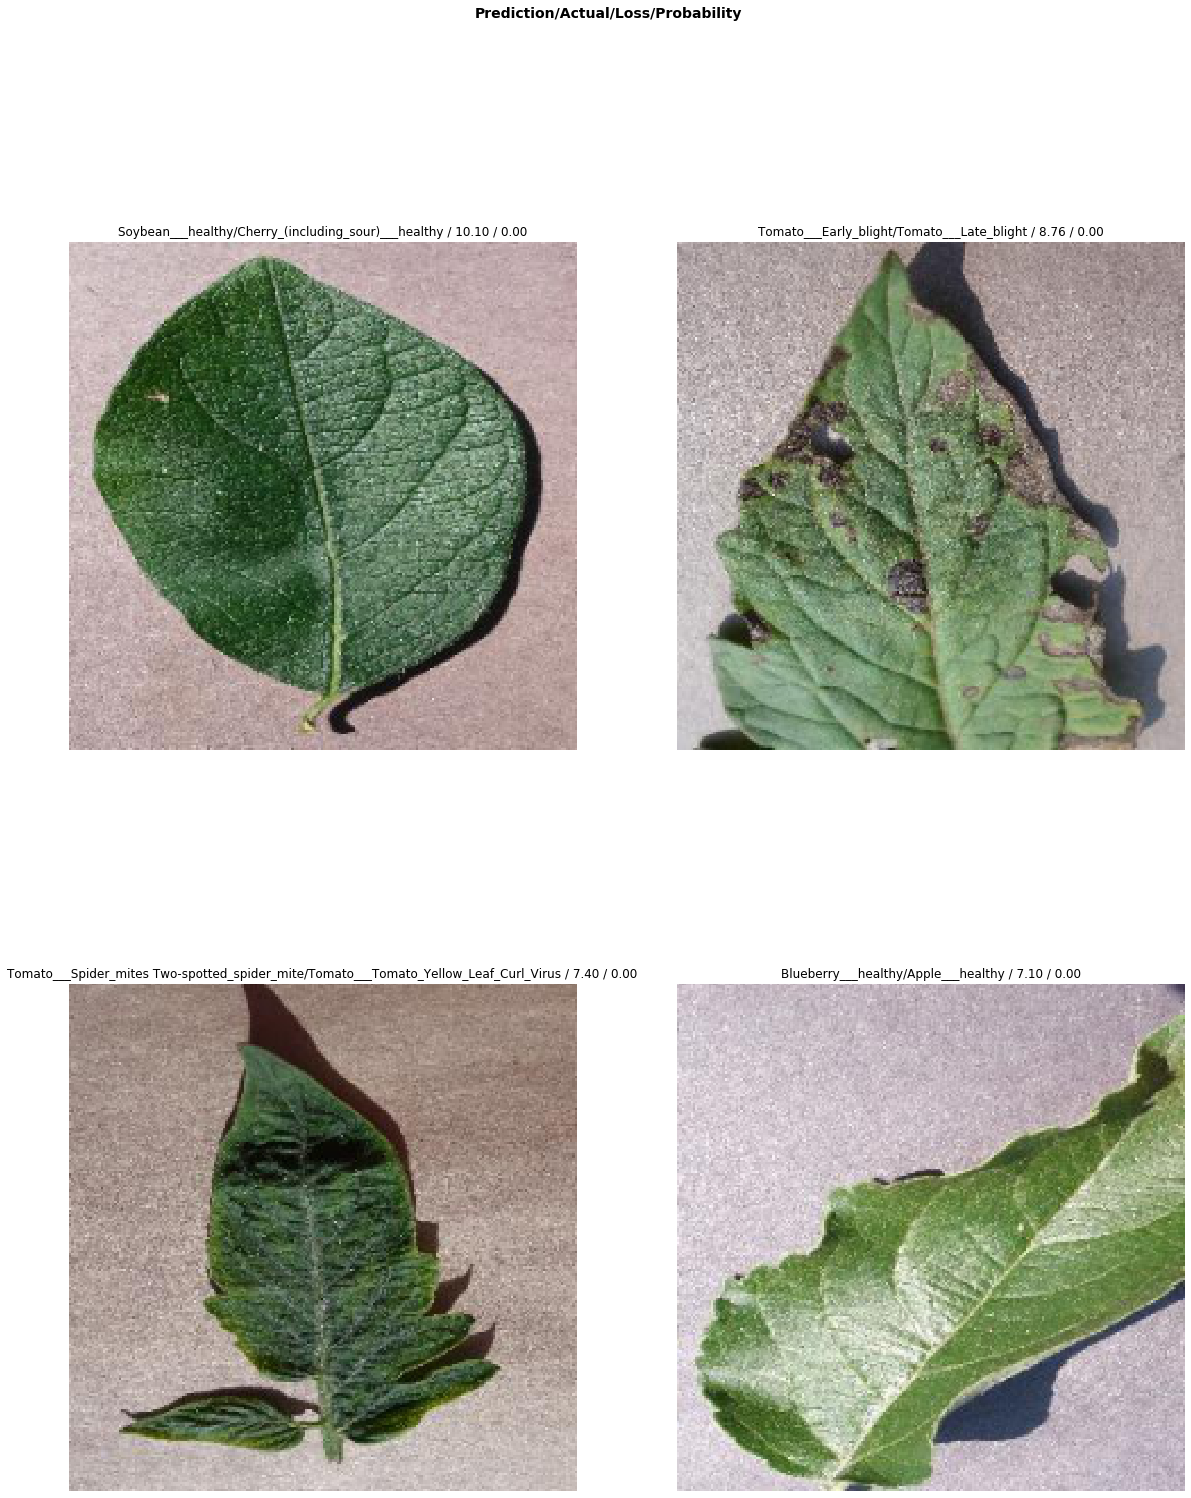

In [0]:
interpret.plot_top_losses(4, figsize=(20, 25))

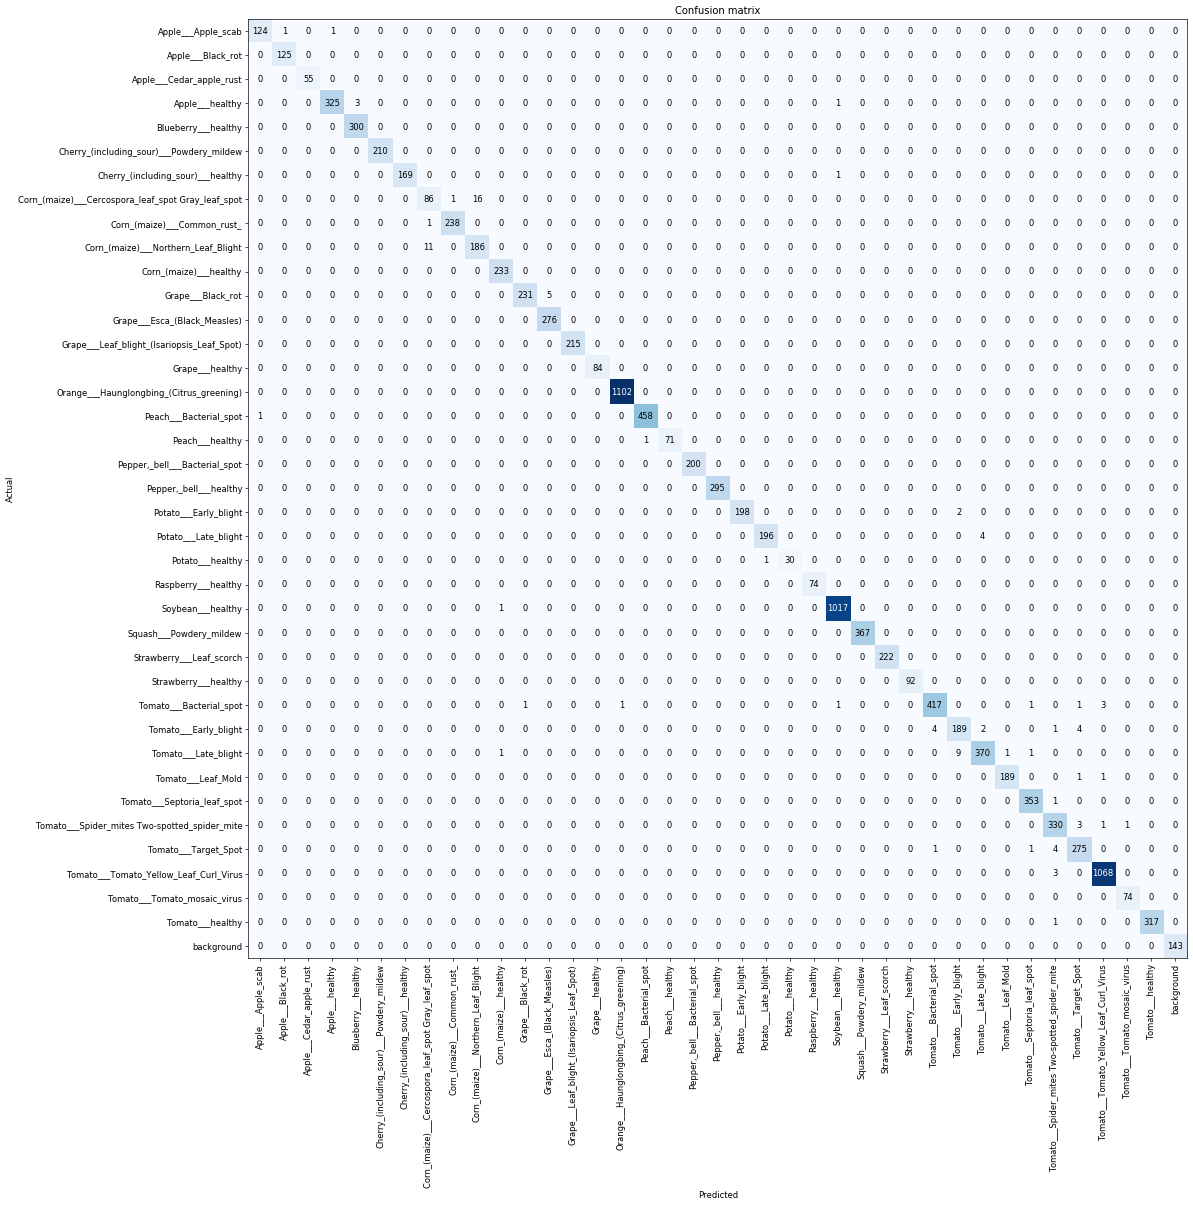

In [0]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [0]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


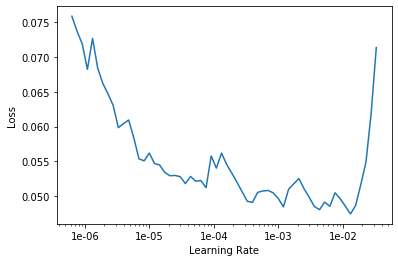

In [0]:
model.recorder.plot()

In [0]:
model.unfreeze()
model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.418589,0.315159,0.900672,0.099328,10:44
1,0.156300,0.070773,0.975645,0.024355,10:47
2,0.041856,0.022637,0.993820,0.006180,10:44


In [0]:
model.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.133875,0.117477,0.966103,0.033897,10:46
1,0.161634,0.111528,0.963377,0.036623,10:40
2,0.096185,0.050389,0.983915,0.016085,10:29
3,0.048142,0.020043,0.994366,0.005634,10:29
4,0.021014,0.014499,0.995729,0.004271,10:30


In [0]:
model.save('train_lr_8_cycles')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


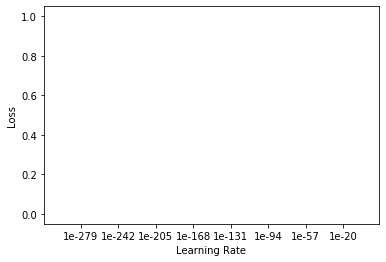

In [0]:
model.freeze()
model.lr_find()
model.recorder.plot()

In [0]:
lr = 1e-3/2
model.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.025788,0.014329,0.995729,0.004271,09:38
1,0.019517,0.014027,0.996092,0.003908,09:41


In [0]:
model.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.020146,0.013593,0.996183,0.003817,09:45
1,0.016866,0.014170,0.996365,0.003635,09:42
2,0.014134,0.013733,0.996638,0.003362,09:41


In [0]:
model.save('train_final5_cycles')

In [0]:
model.load('train_final5_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (44043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Yellow_Leaf_Curl_Virus
Path: /content/drive/My Drive/PlantVillage (1);

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot
Path: /content/drive/My Drive/PlantVillage (1);

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [0]:
model.export('export_resnet34_model.pkl')

In [0]:
from google.colab import files
files.download('export_resnet34_model.pkl') 

FileNotFoundError: ignored

In [0]:
img1=open_image('/content/drive/My Drive/PlantVillage (1)/val/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG')
learn = load_learner(IMG,'export_resnet34_model.pkl')

pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category Apple___Black_rot

In [0]:
pred_class=''
img1=open_image('/content/drive/My Drive/PlantVillage (1)/val/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG')
learn = load_learner(IMG,'export_resnet34_model.pkl')

pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category Apple___Cedar_apple_rust

In [0]:
pred_class=''
img1=open_image('/content/drive/My Drive/PlantVillage (1)/val/Apple___healthy/04125537-801d-4e15-b66c-224b09b4e1a7___RS_HL 7457.JPG')
learn = load_learner(IMG,'export_resnet34_model.pkl')

pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category Apple___healthy

In [0]:
pred_class=''
img1=open_image('/content/drive/My Drive/PlantVillage (1)/val/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG')
learn = load_learner(IMG,'export_resnet34_model.pkl')

pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category Potato___Late_blight

In [0]:
pred_class=''
img1=open_image('/content/drive/My Drive/PlantVillage (1)/val/Tomato___healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG')
learn = load_learner(IMG,'export_resnet34_model.pkl')

pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category Tomato___healthy